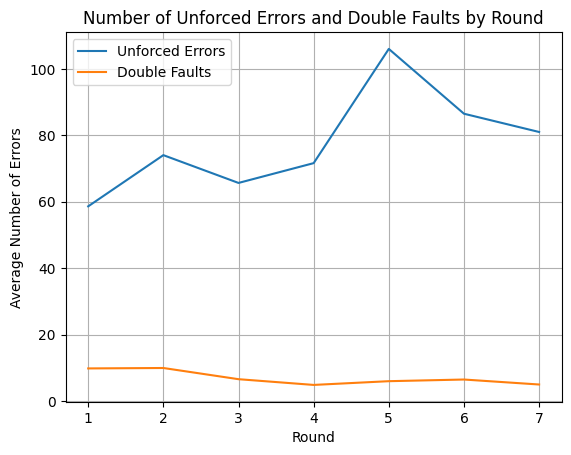

In [3]:
#Is there a pattern or trend in the frequency of  unforced errors and double faults committed by a player as they move from Round 1 to Round 7 of a tournament, given the increased gravity of the matches?
import pandas as pd
import matplotlib.pyplot as plt

# Subset the DataFrame to only include the columns of interest
df1=pd.read_csv("/content/AusOpen-men-2013.csv")
df1["UFE"]=df1["UFE.1"]+df1["UFE.2"]
df1["DBF"]=df1["DBF.1"]+df1["DBF.2"]
df_subset = df1[['Round', 'UFE', 'DBF']]


# Group the DataFrame by round and calculate the mean of the UFE and DBF columns
grouped = df_subset.groupby('Round').mean()


# Create a line chart of the average number of unforced errors and double faults per round
plt.figure()
plt.plot(grouped.index, grouped['UFE'], label='Unforced Errors')
plt.plot(grouped.index, grouped['DBF'], label='Double Faults')

# Add chart labels and legend
plt.xlabel('Round')
plt.ylabel('Average Number of Errors')
plt.title('Number of Unforced Errors and Double Faults by Round')
plt.legend()
plt.grid()
# Show the chart
plt.show()





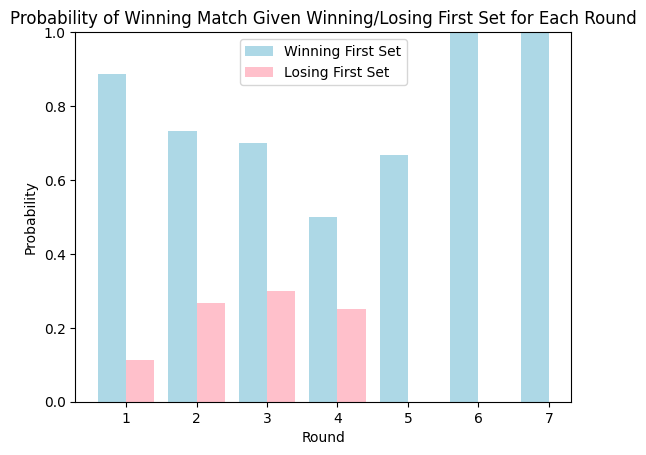

In [4]:
#What is the likelihood that a player who wins the first set of a match will go on to win the entire match?

import pandas as pd
import matplotlib.pyplot as plt
df2=pd.read_csv("/content/AusOpen-women-2013.csv")
# Filter for matches where first set was played
df2 = df2[df2['ST1.1'].notna()]

# Create a new column indicating whether Player 1 won the match or not
df2['Match_Winner'] = (df2['FNL1'] > df2['FNL2']).astype(int)

# Create a new column indicating whether Player 1 won the first set or not
df2['First_Set_Winner'] = (df2['ST1.1'] > df2['ST1.2']).astype(int)

# Calculate the probability of winning the match given that the player wins the first set for each round
p_match_given_first_set = []
p_first_set_given_not_winning=[]
for round_num in df2['Round'].unique():
    p_win_first = df2[(df2['Round'] == round_num) & (df2['First_Set_Winner'] == 1)]['Match_Winner'].mean()
    p_lose_first = df2[(df2['Round'] == round_num) & (df2['First_Set_Winner'] == 0)]['Match_Winner'].mean()
    total = p_win_first + p_lose_first
    if total > 1:
        p_win_first /= total
        p_lose_first /= total
    p_match_given_first_set.append(p_win_first)
    p_first_set_given_not_winning.append(p_lose_first)

# Create a bar chart to compare the probabilities for each round
rounds = df2['Round'].unique()

plt.bar(rounds-0.2, p_match_given_first_set, width=0.4, align='center', label='Winning First Set',color='#ADD8E6')
plt.bar(rounds+0.2, p_first_set_given_not_winning, width=0.4, align='center', label='Losing First Set',color='#FFC0CB')
plt.xticks(rounds)
plt.ylim(0, 1)
plt.xlabel('Round')
plt.ylabel('Probability')
plt.title('Probability of Winning Match Given Winning/Losing First Set for Each Round')
plt.legend()
plt.show()


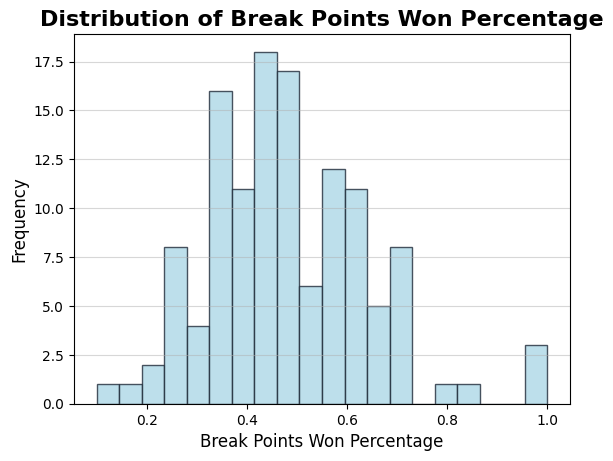

In [5]:
#What is the relationship between a player's percentage of break points won and their chances of winning the match? Can statistical data be used to establish a correlation between these two factors, and if so, how strong is this relationship?

import pandas as pd
import matplotlib.pyplot as plt

# Calculate break points won percentage for each player
df3=pd.read_csv("/content/FrenchOpen-men-2013.csv")
df3["BPWP1"] = df3["BPW.1"] / df3["BPC.1"]
df3["BPWP2"] = df3["BPW.2"] / df3["BPC.2"]

# Create a list of winners and their corresponding break points won percentage
winners = []
BPwinners = []
for i in range(len(df3["Player1"])):
  if df3.iloc[i]["Result"] == 1:
    winners.append(df3.iloc[i]["Player1"])
    BPwinners.append(df3.iloc[i]["BPWP1"])
  else:
    winners.append(df3.iloc[i]["Player2"])
    BPwinners.append(df3.iloc[i]["BPWP2"])

# Add winners and their corresponding break points won percentage as columns to the dataframe
df3["Winners"] = winners
df3["BPwinners"] = BPwinners

# Create histogram of break points won percentage
plt.hist(df3["BPwinners"], bins=20, alpha=0.8, color='#ADD8E6', edgecolor='#1f2a38')

# Add title, axis labels, and grid
plt.title("Distribution of Break Points Won Percentage", fontsize=16, fontweight='bold')
plt.xlabel("Break Points Won Percentage", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.5)

# Show plot
plt.show()


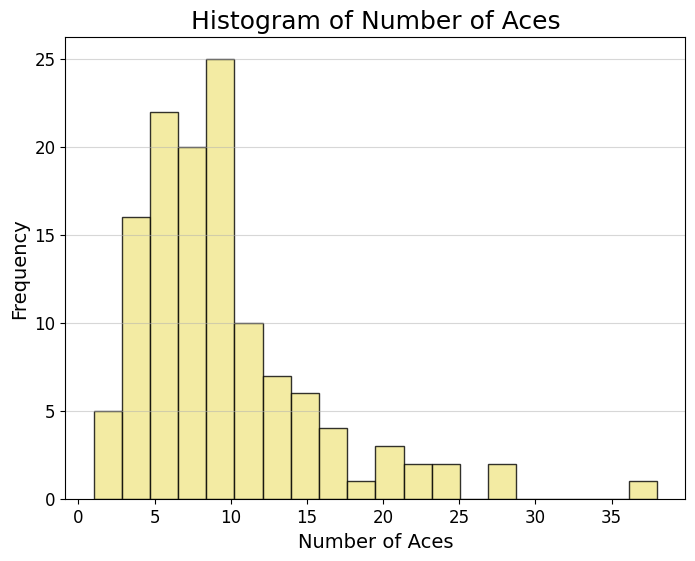

In [6]:
# Can the number of aces won by a player be considered a crucial factor in determining their chances of winning a match, considering that a considerable number of points in the match can be earned through service alone? 

import pandas as pd
import matplotlib.pyplot as plt
df5=pd.read_csv("/content/USOpen-men-2013.csv")
winners=[]
Aces=[]
for i in range(len(df5["Player1"])):
  if df5.iloc[i]["Result"]==1:
    winners.append(df5.iloc[i]["Player1"])
    Aces.append(df5.iloc[i]["ACE.1"])
  else:
    winners.append(df5.iloc[i]["Player2"])
    Aces.append(df5.iloc[i]["ACE.2"])
df5["winners"]=winners
df5["Aces"]=Aces
plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.hist(df5["Aces"], bins=20, color="#F0E68C", alpha=0.8, edgecolor="black")  # Plot the histogram
plt.title("Histogram of Number of Aces", fontsize=18)  # Add a title to the plot
plt.xlabel("Number of Aces", fontsize=14)  # Add a label to the x-axis
plt.ylabel("Frequency", fontsize=14)  # Add a label to the y-axis
plt.xticks(fontsize=12)  # Increase the font size of the x-axis tick labels
plt.yticks(fontsize=12)  # Increase the font size of the y-axis tick labels
plt.grid(axis="y", alpha=0.5)  # Add grid lines to the y-axis
plt.show()  # Show the plot

In [7]:
import pandas as pd

df7 = pd.read_csv('/content/Wimbledon-men-2013.csv')

corr = df7['UFE.1'].corr(df7['WNR.2'])
print(corr)


0.41781230609196346


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


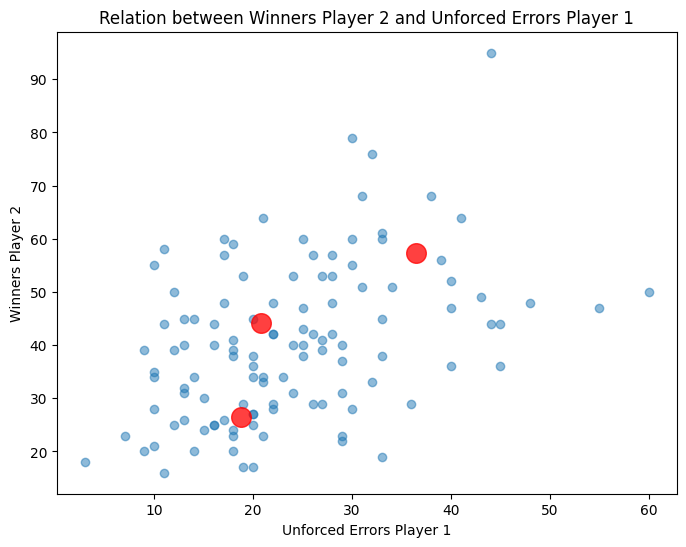

In [8]:
#Is there any correlation between the number of winners gained by Player 2 and the number of unforced errors committed by Player 1 in a tennis match?

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df7 = pd.read_csv("/content/Wimbledon-men-2013.csv")

# Extract the relevant columns
WNR2 = df7['WNR.2']
UFE1 = df7['UFE.1']

# Set up the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('Unforced Errors Player 1')
ax.set_ylabel('Winners Player 2')
ax.set_title('Relation between Winners Player 2 and Unforced Errors Player 1')

# Create the scatter plot
plt.scatter(UFE1, WNR2, alpha=0.5)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df7[['UFE.1', 'WNR.2']])
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.75)

plt.show()


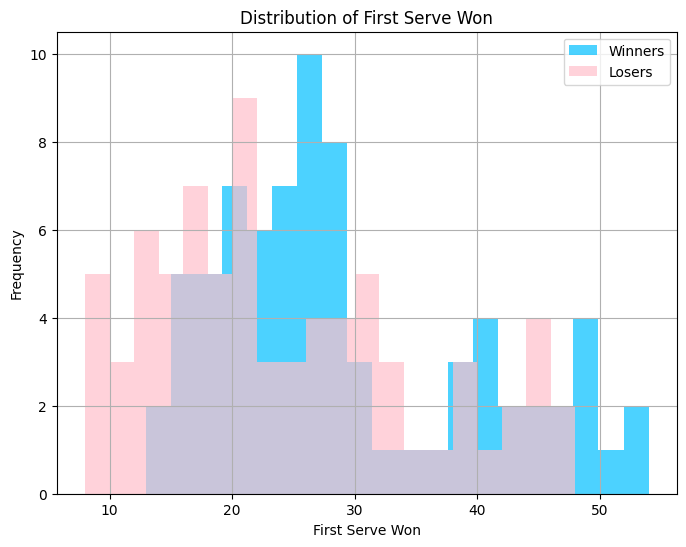

<Axes: ylabel='Density'>

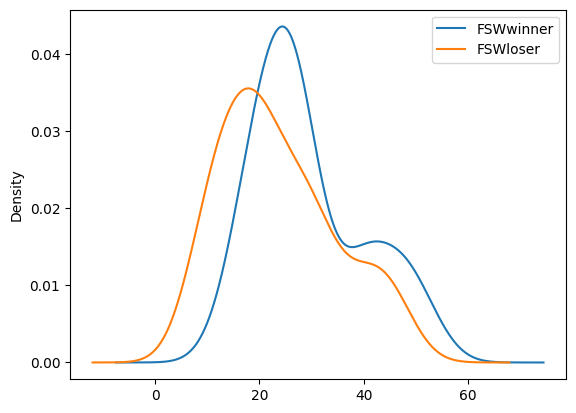

In [9]:
#Can a disparity be observed in the distribution of number of first serve won (FSW) between players who emerge as winners and those who lose in a tennis match? 

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df6 = pd.read_csv("/content/USOpen-women-2013.csv")

# Extract the relevant columns
winners=[]
FSWwinner=[]
losers=[]
FSWloser=[]
for i in range(len(df6["Player 1"])):
  if df6.iloc[i]["Result"]==1:
    winners.append(df6.iloc[i]["Player 1"])
    FSWwinner.append(df6.iloc[i]["FSW.1"])
    losers.append(df6.iloc[i]["Player 2"])
    FSWloser.append(df6.iloc[i]["FSW.2"])
  else:
    winners.append(df6.iloc[i]["Player 2"])
    FSWwinner.append(df6.iloc[i]["FSW.2"])
    losers.append(df6.iloc[i]["Player 1"])
    FSWloser.append(df6.iloc[i]["FSW.1"])
df_=pd.DataFrame()
df6["winners"]=winners
df6["losers"]=losers
df6["FSWwinner"]=FSWwinner
df6["FSWloser"]=FSWloser
df_["FSWwinner"]=FSWwinner
df_["FSWloser"]=FSWloser

# Set up the plot
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel('First Serve Won')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of First Serve Won')

# Create overlapping histograms for FSPwinner and FSPloser
plt.hist(df6['FSWwinner'], bins=20, alpha=0.7, label='Winners', color='#00bfff')
plt.hist(df6['FSWloser'], bins=20, alpha=0.7, label='Losers', color='#ffc0cb')

# Add grid lines and legend
plt.grid()
plt.legend()

# Show the plot
plt.show()
df_.plot.kde()


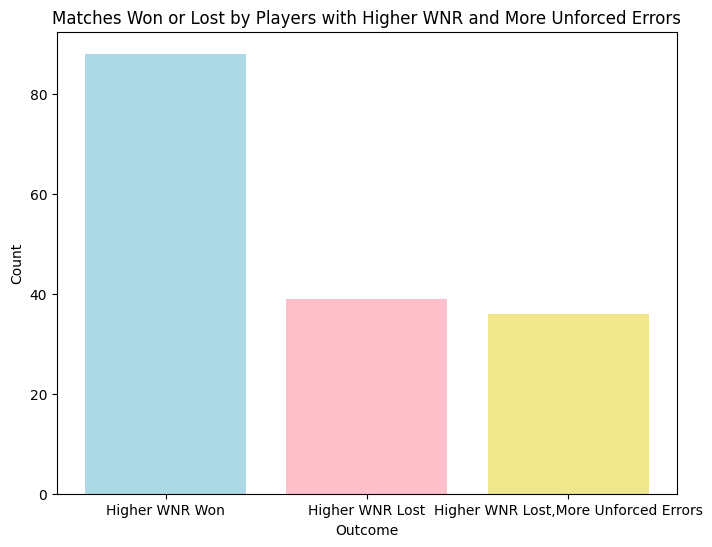

In [10]:
#Can a scenario arise where a player, despite having a higher number of winners (wnr), could still end up losing the match due to other factors such as committing a higher number of unforced errors?

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df4 = pd.read_csv("/content/FrenchOpen-women-2013.csv")
Higherwnrwin=[]
Higherwnrlost=[]
Higherwnrlost_more_unforced_errors=[]

for i in range(len(df4["Player1"])):
  if df4.iloc[i]["WNR.1"] > df4.iloc[i]["WNR.2"]:
    if df4.iloc[i]["Result"] == 1:
      Higherwnrwin.append(df4.iloc[i]["Player1"])
    else:
      Higherwnrlost.append(df4.iloc[i]["Player1"])
      if df4.iloc[i]["UFE.1"] > df4.iloc[i]["UFE.2"]:
        Higherwnrlost_more_unforced_errors.append(df4.iloc[i]["Player1"])
  else:
    if df4.iloc[i]["Result"] == 0:
      Higherwnrwin.append(df4.iloc[i]["Player2"])
    else:
      Higherwnrlost.append(df4.iloc[i]["Player2"])
      if df4.iloc[i]["UFE.2"] > df4.iloc[i]["UFE.1"]:
        Higherwnrlost_more_unforced_errors.append(df4.iloc[i]["Player2"])

y = [len(Higherwnrwin), len(Higherwnrlost), len(Higherwnrlost_more_unforced_errors)]
colors = ['#ADD8E6', '#FFC0CB', '#F0E68C']
plt.figure(figsize=(8, 6))
plt.bar(['Higher WNR Won', 'Higher WNR Lost', 'Higher WNR Lost,More Unforced Errors'], y, color=colors)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Matches Won or Lost by Players with Higher WNR and More Unforced Errors')
plt.show()


[29, 38, 26, 26, 26, 21, 31]
[16, 11, 10, 7, 15, 10, 7]
[4.0, 1.0, 1.0, 1.0, 0.0, 5.0, 2.0]
[30, 22, 20, 12, 6, 23, 15]
[3, 5, 6, 5, 6, 5, 5]
[13, 12, 7, 2, 4, 11, 9]


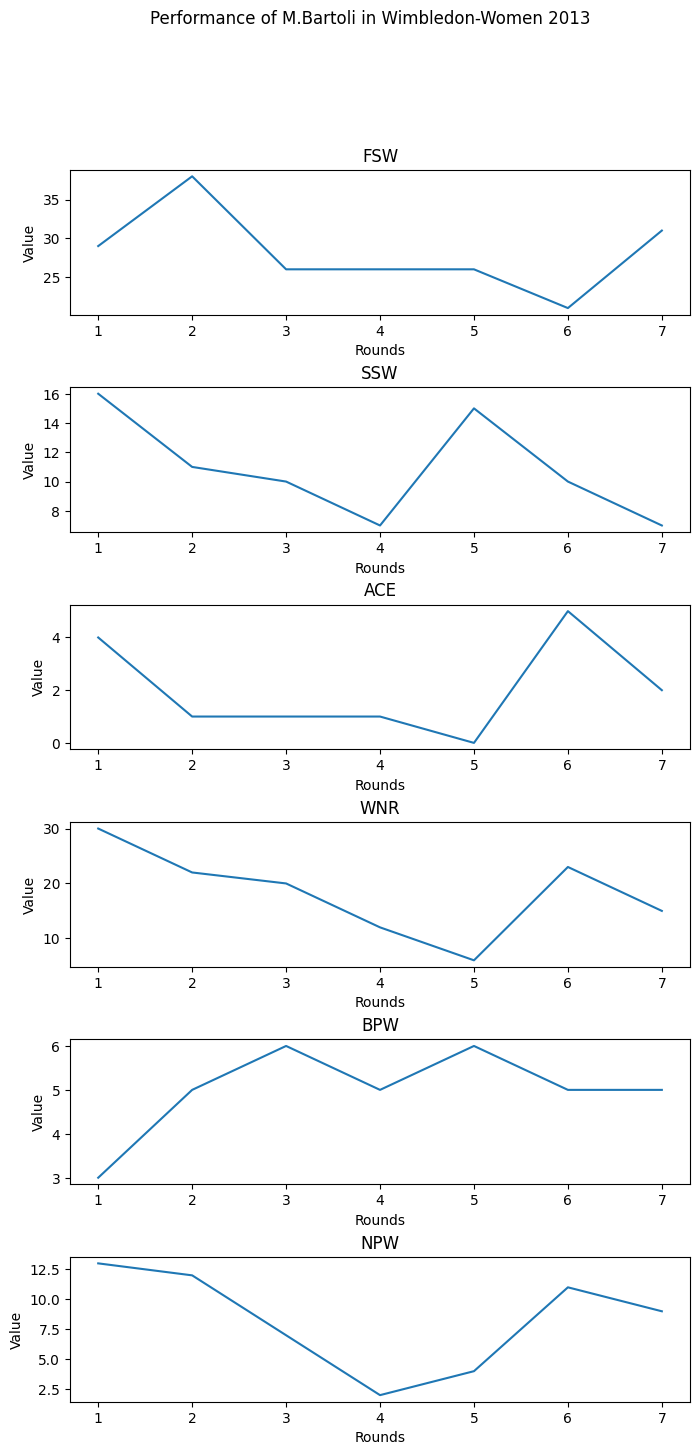

In [11]:
#What trends can be observed in various parameters such as first serve won, second serve won, aces won, winners earned, break points won, and net points won over the seven rounds for the winner of the tournament?
import pandas as pd

# Read the dataset
df8 = pd.read_csv("/content/Wimbledon-women-2013.csv")

# Extract the name of the final winner from the last row of the "df" dataframe
df=df8[df8["Round"]==7]
if df.iloc[0]["Result"]==1:
  winner=df.iloc[0]["Player1"]
else:
  winner=df.iloc[0]["Player2"]

# Initialize empty lists
fsw = []
ssw = []
ace = []
wnr = []
bpw = []
npw = []

# Iterate through each row of the "df8" dataframe
for i in range(len(df8)):
    # Check if the winner's name appears in either "Player1" or "Player2" column
    if df8.iloc[i]["Player1"] == winner:
        fsw.append(df8.iloc[i]["FSW.1"])
        ssw.append(df8.iloc[i]["SSW.1"])
        ace.append(df8.iloc[i]["ACE.1"])
        wnr.append(df8.iloc[i]["WNR.1"])
        bpw.append(df8.iloc[i]["BPW.1"])
        npw.append(df8.iloc[i]["NPW.1"])
    elif df8.iloc[i]["Player2"] == winner:
        fsw.append(df8.iloc[i]["FSW.2"])
        ssw.append(df8.iloc[i]["SSW.2"])
        ace.append(df8.iloc[i]["ACE.2"])
        wnr.append(df8.iloc[i]["WNR.2"])
        bpw.append(df8.iloc[i]["BPW.2"])
        npw.append(df8.iloc[i]["NPW.2"])

# Print the lists
print(fsw)
print(ssw)
print(ace)
print(wnr)
print(bpw)
print(npw)
y=[1,2,3,4,5,6,7]
fig, axs = plt.subplots(6, 1, figsize=(8, 16))
axs[0].plot(y, fsw)
axs[0].set_title('FSW')

axs[1].plot(y, ssw)
axs[1].set_title('SSW')

axs[2].plot(y, ace)
axs[2].set_title('ACE')

axs[3].plot(y, wnr)
axs[3].set_title('WNR')

axs[4].plot(y, bpw)
axs[4].set_title('BPW')

axs[5].plot(y, npw)
axs[5].set_title('NPW')

# Set x-axis label and ticks
for ax in axs.flat:
    ax.set(xlabel='Rounds',ylabel="Value", xticks=[1, 2, 3, 4, 5, 6, 7])

# Set overall title for the plot
fig.suptitle('Performance of ' + winner + ' in Wimbledon-Women 2013')
plt.subplots_adjust(hspace=0.5)
# Show the plot
plt.show()
